In [13]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

##### –ó–∞–¥–∞–Ω–∏–µ 1

–ó–∞–≥—Ä—É–∑–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ, –ø—Ä–æ–≤–µ—Ä—å—Ç–µ —á–∏—Å–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∏ —Å—Ç–æ–ª–±—Ü–æ–≤, –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤. –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∏ –ø—Ä–æ—á–∏—Ç–∞–Ω—ã –ø—Ä–∞–≤–∏–ª—å–Ω–æ. –ü—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ ‚Äì –ø—Ä–∏–≤–µ–¥–∏—Ç–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∫ –Ω—É–∂–Ω—ã–º —Ç–∏–ø–∞–º.

–ï—Å—Ç—å –ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è?

In [7]:
df = pd.read_csv('london.csv', parse_dates=['timestamp'])

In [12]:
df.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

In [8]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [9]:
df.describe()

cnt            t1            t2           hum    wind_speed  \
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
mean    1143.101642     12.468091     11.520836     72.324954     15.913063   
std     1085.108068      5.571818      6.615145     14.313186      7.894570   
min        0.000000     -1.500000     -6.000000     20.500000      0.000000   
25%      257.000000      8.000000      6.000000     63.000000     10.000000   
50%      844.000000     12.500000     12.500000     74.500000     15.000000   
75%     1671.750000     16.000000     16.000000     83.000000     20.500000   
max     7860.000000     34.000000     34.000000    100.000000     56.500000   

       weather_code    is_holiday    is_weekend        season  
count  17414.000000  17414.000000  17414.000000  17414.000000  
mean       2.722752      0.022051      0.285403      1.492075  
std        2.341163      0.146854      0.451619      1.118911  
min        1.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000      0.000000  
50%        2.000000      0.000000      0.000000      1.000000  
75%        3.000000      0.000000      1.000000      2.000000  
max       26.000000      1.000000      1.000000      3.000000

In [11]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

##### –ó–∞–¥–∞–Ω–∏–µ 2

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ –ø–æ –¥–∞—Ç–∞–º –∏ –≤—Ä–µ–º–µ–Ω–∏. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫, –≥–¥–µ:

–ø–æ –æ—Å–∏ x ‚Äì –¥–∞—Ç–∞ (timestamp)
–ø–æ –æ—Å–∏ y ‚Äì —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ (cnt)
–í—ã–±–µ—Ä–∏—Ç–µ –≤–µ—Ä–Ω—ã–µ —É—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è:

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

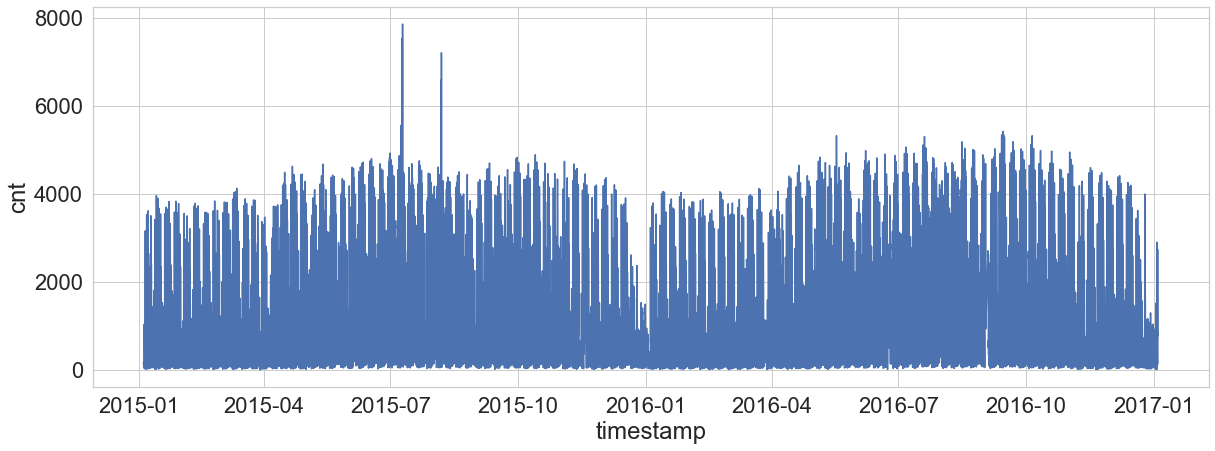

In [18]:
sns.lineplot(data=df, x='timestamp', y='cnt')

##### –ó–∞–¥–∞–Ω–∏–µ 3

–û—Ç–ª–∏—á–Ω–æ! –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω—É–∂–Ω–æ –Ω–µ–º–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å. –í —ç—Ç–æ–º –Ω–∞–º –ø–æ–º–æ–∂–µ—Ç resample, —Å –∫–æ—Ç–æ—Ä—ã–º –≤—ã –º–æ–≥–ª–∏ —Å—Ç–æ–ª–∫–Ω—É—Ç—å—Å—è –≤ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ç–µ–º–∞—Ö pandas. –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –∏ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –∫ –∫–∞–∫–æ–º—É-–ª–∏–±–æ —Å—Ç–æ–ª–±—Ü—É –¥—Ä—É–≥–æ–π –º–µ—Ç–æ–¥ (–Ω–∞–ø—Ä. sum). –¢–∞–∫ –º–æ–∂–Ω–æ —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∑–∞ –≤–µ—Å—å –¥–µ–Ω—å –∏–ª–∏ –º–µ—Å—è—Ü, –∏–º–µ—è –¥–∞–Ω–Ω—ã–µ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ –º–∏–Ω—É—Ç. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ—Å—á–∏—Ç–∞—Ç—å —Å—É–º–º—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –ø–æ –¥–Ω—è–º, –∏–º–µ—è –¥–∞–Ω–Ω—ã–µ –ø–æ —á–∞—Å–∞–º, –º–æ–∂–Ω–æ —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:
<pre>
<code>
data.resample(rule='D').column_name.sum() #—Å–ø–æ—Å–æ–± 1
data.resample(rule='D').agg({'column_name':'sum'}) #—Å–ø–æ—Å–æ–± 2, —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω—ã–π –ø—Ä–µ–¥—ã–¥—É—â–µ–º—É
</code>
</pre>
–ê–≥—Ä–µ–≥–∏—Ä—É–π—Ç–µ —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ –ø–æ –¥–Ω—è–º –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –ß—Ç–æ –≤—ã –º–æ–∂–µ—Ç–µ —Å–∫–∞–∑–∞—Ç—å –æ –ø–æ–ª—É—á–µ–Ω–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ?

In [63]:
df_resampled_by_day = df.resample(rule='D', on='timestamp').cnt.sum().reset_index()

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

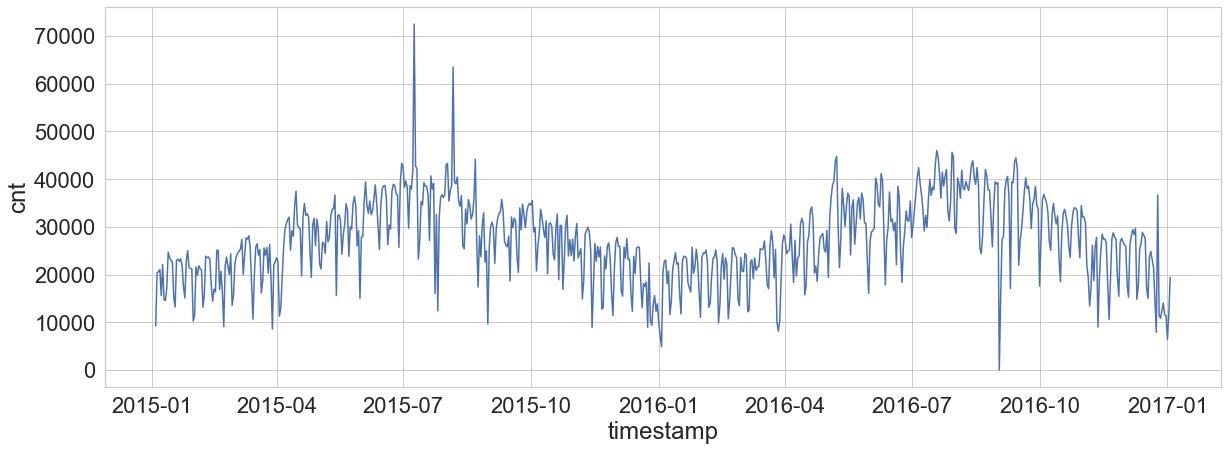

In [22]:
sns.lineplot(data=df_resampled_by_day, x='timestamp', y='cnt')

##### –ó–∞–¥–∞–Ω–∏–µ 4

–ò—Ç–∞–∫, –≤—ã –æ–±–Ω–∞—Ä—É–∂–∏–ª–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–∫–∞—á–∫–∏. –î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –∂–µ –º–æ–≥–ª–æ –ø—Ä–æ–∏–∑–æ–π—Ç–∏ –≤ —Ç–æ—Ç –¥–µ–Ω—å ü§î.

–î–ª—è —ç—Ç–æ–≥–æ —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–ª—å–Ω–µ–π—à–∏–µ –¥–µ–π—Å—Ç–≤–∏—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç—Ç–∞–ø–æ–≤:

* —Å–Ω–∞—á–∞–ª–∞ –ø–æ—Å—á–∏—Ç–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ, —á—Ç–æ–±—ã —Å–≥–ª–∞–¥–∏—Ç—å —Ä—è–¥
* –¥–∞–ª–µ–µ ‚Äì —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –Ω–∞–±–ª—é–¥–∞–µ–º—ã–º–∏ –∏ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
* –æ–ø—Ä–µ–¥–µ–ª–∏–º –≤–µ—Ä—Ö–Ω–∏–µ –∏ –Ω–∏–∂–Ω–∏–µ –≥—Ä–∞–Ω–∏—Ü—ã 99% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ 
* –Ω–∞–π–¥–µ–º –ø—Ä–∏—á–∏–Ω—ã –∞–Ω–æ–º–∞–ª–∏–π!

–ù–∞ –¥–∞–Ω–Ω–æ–º —à–∞–≥–µ –≤–æ–∑—å–º–∏—Ç–µ –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–Ω—è–º —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —à–∞–≥–∞ –∏ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —Å –æ–∫–Ω–æ–º 3. –í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Ç–≤–µ—Ç–∞ —É–∫–∞–∂–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ —á–∏—Å–ª–æ –∞—Ä–µ–Ω–¥ –∑–∞ 2015-07-09, –æ–∫—Ä—É–≥–ª–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–æ —Ü–µ–ª–æ–≥–æ.

In [64]:
df_resampled_by_day['roll_mean'] = df_resampled_by_day.rolling(on='timestamp', window=3).cnt.mean()

In [69]:
df_resampled_by_day.query('timestamp == "2015-07-09"')

timestamp    cnt  roll_mean   diff_v
186 2015-07-09  72504    50705.0  21799.0

##### –ó–∞–¥–∞–Ω–∏–µ 5

–¢–µ–ø–µ—Ä—å –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –Ω–∞–±–ª—é–¥–∞–µ–º—ã–º–∏ –∏ –ø–æ–¥—Å—á–∏—Ç–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏. –î–∞–ª–µ–µ ‚Äì –ø—Ä–∏–º–µ–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è. –ù–∞–ø—Ä–∏–º–µ—Ä:
<pre>
<code>
c = a - b
std = np.std(c)
</code>
</pre>
–í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Ç–≤–µ—Ç–∞ –≤–≤–µ–¥–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ, –æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ–µ –¥–æ 2 –∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —Ç–æ—á–∫–∏.

In [73]:
df_resampled_by_day['diff_v'] = df_resampled_by_day.cnt.subtract(df_resampled_by_day.roll_mean)

In [77]:
std_v = np.std(df_resampled_by_day.diff_v)
round(std_v,2)

4558.59

#### –ó–∞–¥–∞–Ω–∏–µ 6

–¢–µ–ø–µ—Ä—å –æ–ø—Ä–µ–¥–µ–ª–∏–º –≥—Ä–∞–Ω–∏—Ü—ã –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤. –î–ª—è —ç—Ç–æ–≥–æ –Ω—É–∂–Ω–æ –≤–∑—è—Ç—å –¥–∞–Ω–Ω—ã–µ, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –ø—Ä–∏ —Ä–∞—Å—á–µ—Ç–µ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ, –∏ —Å–æ–∑–¥–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –æ–±—ä–µ–∫—Ç—ã:
<pre>
<code>
upper_bound ‚Äì –≤–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞; –∫ —Å—Ä–µ–¥–Ω–∏–º –ø—Ä–∏–±–∞–≤–ª—è–µ–º 2.576‚àóstd
lower_bound ‚Äì –Ω–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞; –≤—ã—á–∏—Ç–∞–µ–º 2.576‚àóstd
</code>
</pre>
–ü–æ–ª—É—á–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–ø–∏—à–∏—Ç–µ –≤ –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ —Å –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏.

–ß–µ–º—É —Ä–∞–≤–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ –≤–µ—Ä—Ö–Ω–µ–π –≥—Ä–∞–Ω–∏—Ü—ã –¥–ª—è –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è? –û—Ç–≤–µ—Ç —É–∫–∞–∂–∏—Ç–µ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ 2 –∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —Ç–æ—á–∫–∏.

Note: –≤ –∫–∞—á–µ—Å—Ç–≤–µ std –Ω—É–∂–Ω–æ –±—Ä–∞—Ç—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –±–µ–∑ –æ–∫—Ä—É–≥–ª–µ–Ω–∏—è.

Note 2: –≤–∞–º –º–æ–∂–µ—Ç –ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è —É–±—Ä–∞—Ç—å –¥–∞—Ç—ã –∏–∑ –∏–Ω–¥–µ–∫—Å–∞ - –∏–Ω–æ–≥–¥–∞ –∏–∑-–∑–∞ —ç—Ç–æ–≥–æ –∫–æ–ª–æ–Ω–∫–∏ –º–æ–≥—É—Ç –Ω–µ –ø—Ä–∏—Å–≤–∞–∏–≤–∞—Ç—å—Å—è –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º. –í–∞–º –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è .reset_index().

In [78]:
koef_99 = 2.576
df_resampled_by_day['upper_bound'] = df_resampled_by_day.roll_mean + koef_99 * std_v
df_resampled_by_day['lower_bound'] = df_resampled_by_day.roll_mean - koef_99 * std_v

In [87]:
df_resampled_by_day.tail(1).upper_bound.round(2)

730    24302.92
Name: upper_bound, dtype: float64

#### –ó–∞–¥–∞–Ω–∏–µ 7

–ò –Ω–∞–∫–æ–Ω–µ—Ü ‚Äì –∏–∑—É—á–∏–º –∞–Ω–æ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è! –°–Ω–∞—á–∞–ª–∞ –≤—ã–≤–µ–¥–∏—Ç–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–∫–∞–∑–∞–ª–∏—Å—å –±–æ–ª—å—à–µ –≤–µ—Ä—Ö–Ω–µ–π –≥—Ä–∞–Ω–∏—Ü—ã 99% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞.

–í –∫–∞–∫–æ–π –¥–µ–Ω—å –∑–Ω–∞—á–µ–Ω–∏–µ —á–∏—Å–ª–∞ –∞—Ä–µ–Ω–¥ –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–∞–∏–±–æ–ª—å—à–∏–º? –£–∫–∞–∂–∏—Ç–µ –¥–∞—Ç—É –≤ —Ñ–æ—Ä–º–∞—Ç–µ 2020-12-31.

In [92]:
df_max = df_resampled_by_day.query('cnt > upper_bound').sort_values(by='cnt', ascending=False)
df_max

timestamp    cnt     roll_mean        diff_v   upper_bound   lower_bound
186 2015-07-09  72504  50705.000000  21799.000000  62447.919188  38962.080812
214 2015-08-06  63468  46627.333333  16840.666667  58370.252521  34884.414146
721 2016-12-25  36653  19650.666667  17002.333333  31393.585854   7907.747479
609 2016-09-04  27512  14259.000000  13253.000000  26001.919188   2516.080812

#### –ó–∞–¥–∞–Ω–∏–µ 8

–ü–æ–¥—É–º–∞–π—Ç–µ, –≤ —á–µ–º –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏—á–∏–Ω–∞ —Å—Ç–æ–ª—å –≤—ã—Å–æ–∫–æ–≥–æ —á–∏—Å–ª–∞ –∞—Ä–µ–Ω–¥ –≤ —ç—Ç–æ—Ç –¥–µ–Ω—å. –î–ª—è —ç—Ç–æ–≥–æ –º–æ–∂–µ—Ç–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å —É–∂–µ –∏–º–µ—é—â–∏–µ—Å—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞–ª–∏—á–∏–µ –æ—à–∏–±–æ–∫ –≤ –¥–∞–Ω–Ω—ã—Ö (–ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è —Å—Ç—Ä–æ–∫), –∞ —Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–æ–∏—Å–∫ Google. 

–í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Ç–≤–µ—Ç–∞ –≤—ã–±–µ—Ä–∏—Ç–µ –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—É—é –ø—Ä–∏—á–∏–Ω—É —Å—Ç–æ–ª—å —Ä–µ–∑–∫–æ–≥–æ —Å–∫–∞—á–∫–∞:

##### –ó–∞–¥–∞–Ω–∏–µ 9

–ü—Ä–æ–¥–µ–ª–∞–π—Ç–µ –∞–Ω–∞–ª–æ–≥–∏—á–Ω—É—é –æ–ø–µ—Ä–∞—Ü–∏—é –¥–ª—è –¥–Ω–µ–π, –∫–æ–≥–¥–∞ —á–∏—Å–ª–æ –∞—Ä–µ–Ω–¥ –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–∏–∂–µ –æ–∂–∏–¥–∞–µ–º–æ–≥–æ. –í —á–µ–º –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏—á–∏–Ω–∞ –ø–∞–¥–µ–Ω–∏—è —á–∏—Å–ª–∞ –∞—Ä–µ–Ω–¥ 2016-09-02?

In [108]:
df_min = df_resampled_by_day.query('cnt < lower_bound').sort_values(by='cnt', ascending=False)
df_min

timestamp    cnt     roll_mean        diff_v   upper_bound   lower_bound
189 2015-07-12  23240  36036.666667 -12796.666667  47779.585854  24293.747479
621 2016-09-16  21967  36193.333333 -14226.333333  47936.252521  24450.414146
232 2015-08-24  17400  29529.333333 -12129.333333  41272.252521  17786.414146
615 2016-09-10  17080  31262.000000 -14182.000000  43004.919188  19519.080812
201 2015-07-24  16034  31013.666667 -14979.666667  42756.585854  19270.747479
130 2015-05-14  15609  28709.333333 -13100.333333  40452.252521  16966.414146
678 2016-11-12   8990  20878.000000 -11888.000000  32620.919188   9135.080812
314 2015-11-14   8898  21037.333333 -12139.333333  32780.252521   9294.414146
607 2016-09-02      0  26086.333333 -26086.333333  37829.252521  14343.414146

In [123]:
df.query('timestamp > "2016-09-02" and timestamp < "2016-09-03"')

Empty DataFrame
Columns: [timestamp, cnt, t1, t2, hum, wind_speed, weather_code, is_holiday, is_weekend, season, date]
Index: []